The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

N - 1000(N - 0.63)^2 where N is the proportion of Non-Americans by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [1]:
import numpy as np
import pandas as pd

In [2]:
#see in dataset no any header or column name availabe so i put column_names
#delimiter=r"\s+" bcz our file is space separated file
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'N', 'LSTAT', 'MEDV']
housing = pd.read_csv("/content/housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
print(np.shape(housing))

(506, 14)


In [21]:
print(housing.describe())

             CRIM          ZN       INDUS  ...           N       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [22]:
#find null value in dataset
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
N          0
LSTAT      0
MEDV       0
dtype: int64

# for Example
our dataset is person heights and weight prediction
####suppose  
####        170cm  --  70kg
 ####        160cm  --  60kg
but some cases 160cm height ---- 120kg so 
#this called Outlier data





#chack in our case any outlier dataset or not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


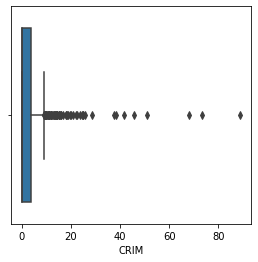

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,4))
plt.subplot(1,5,1)  
sns.boxplot(housing['CRIM'])
#see after 30 CRIM all value us outlier
#bcz this value is not a close to a blue line
#you can generate all column bocplot
#search on google many outlier handling technique

In [24]:
#all column name and there data
for k,v in housing.items():
    print(k,v)

CRIM 0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64
ZN 0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64
INDUS 0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64
CHAS 0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64
NOX 0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64
RM 0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502  

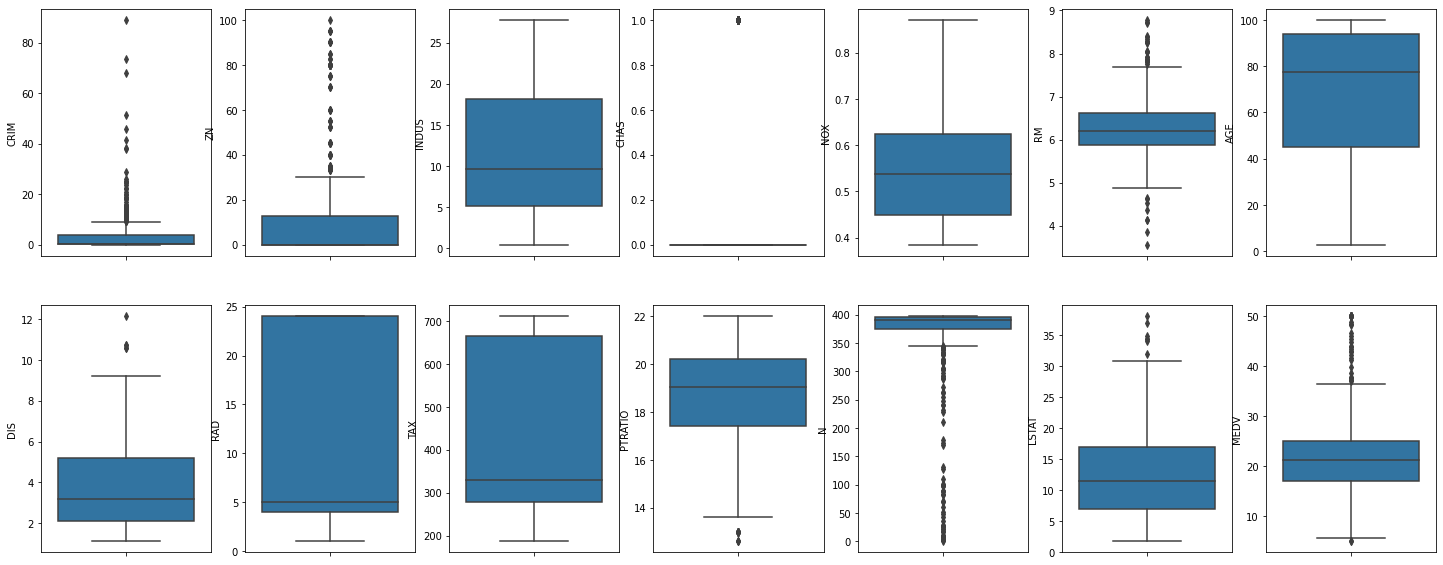

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(25, 10))

index=0
axs = axs.flatten()
for k,v in housing.items():
    sns.boxplot(y=v, ax=axs[index])
    index += 1

#see value of MEDV , some value in blue box and some value vary long-distance form the box this callde outlier

In [26]:
#lets remove features of MEDV columns below 50
(housing['MEDV'] >= 50.0)
#see some value <50 then False and other are True

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: MEDV, Length: 506, dtype: bool

In [27]:
#make negation of MEDV >= 50
~(housing['MEDV'] >= 50.0)

#mean i put only this tipy of date ther havin <50

0      True
1      True
2      True
3      True
4      True
       ... 
501    True
502    True
503    True
504    True
505    True
Name: MEDV, Length: 506, dtype: bool

In [28]:
housing = housing[~(housing['MEDV'] >= 50.0)]
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [29]:
print(np.shape(housing))

(490, 14)


In [30]:
#this is corelation matrix
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,MEDV
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


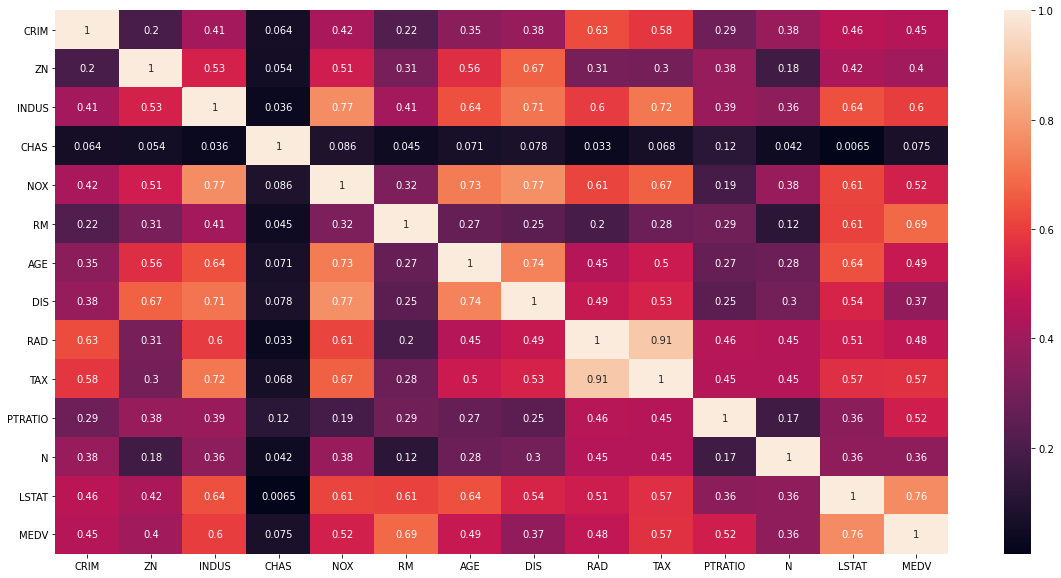

In [31]:
#styling in corelation mtrix
plt.figure(figsize=(20, 10))
sns.heatmap(housing.corr().abs(),  annot=True)

#in our datse MEDV is our output column
#then see metrix which column is less correlate with MEDV
#i see MEDV with CHAS is vary less correlate so you can remove also 

In [32]:
#in the matrix above it is seemed that TAX and RAD coloumns are highly correlated but LSTAT,INDUS,RM,TAX,NOX,PTRAIO columns have low correlation.
#i put only this column, this highly correlated of MEDV
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
#x input and y output column
x = housing.loc[:,column_sels]
y = housing['MEDV']
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,4.98,2.31,0.538,15.3,6.575,296.0,4.0900,65.2
1,9.14,7.07,0.469,17.8,6.421,242.0,4.9671,78.9
2,4.03,7.07,0.469,17.8,7.185,242.0,4.9671,61.1
3,2.94,2.18,0.458,18.7,6.998,222.0,6.0622,45.8
4,5.33,2.18,0.458,18.7,7.147,222.0,6.0622,54.2
...,...,...,...,...,...,...,...,...
501,9.67,11.93,0.573,21.0,6.593,273.0,2.4786,69.1
502,9.08,11.93,0.573,21.0,6.120,273.0,2.2875,76.7
503,5.64,11.93,0.573,21.0,6.976,273.0,2.1675,91.0
504,6.48,11.93,0.573,21.0,6.794,273.0,2.3889,89.3


In [33]:
#in dataset some small and some large value alive so i use min-max scaler 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#pd.DataFrame(data=min_max_scaler.fit_transform(x), give column name)
#you don't write "columns=column_sels" then see what output here
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.268711,0.641607
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.348524,0.782698
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.348524,0.599382
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.448173,0.441813
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.448173,0.528321
...,...,...,...,...,...,...,...,...
485,0.213670,0.414444,0.386831,0.893617,0.580954,0.164122,0.122080,0.681771
486,0.197277,0.414444,0.386831,0.893617,0.490324,0.164122,0.104691,0.760041
487,0.101695,0.414444,0.386831,0.893617,0.654340,0.164122,0.093771,0.907312
488,0.125035,0.414444,0.386831,0.893617,0.619467,0.164122,0.113918,0.889804


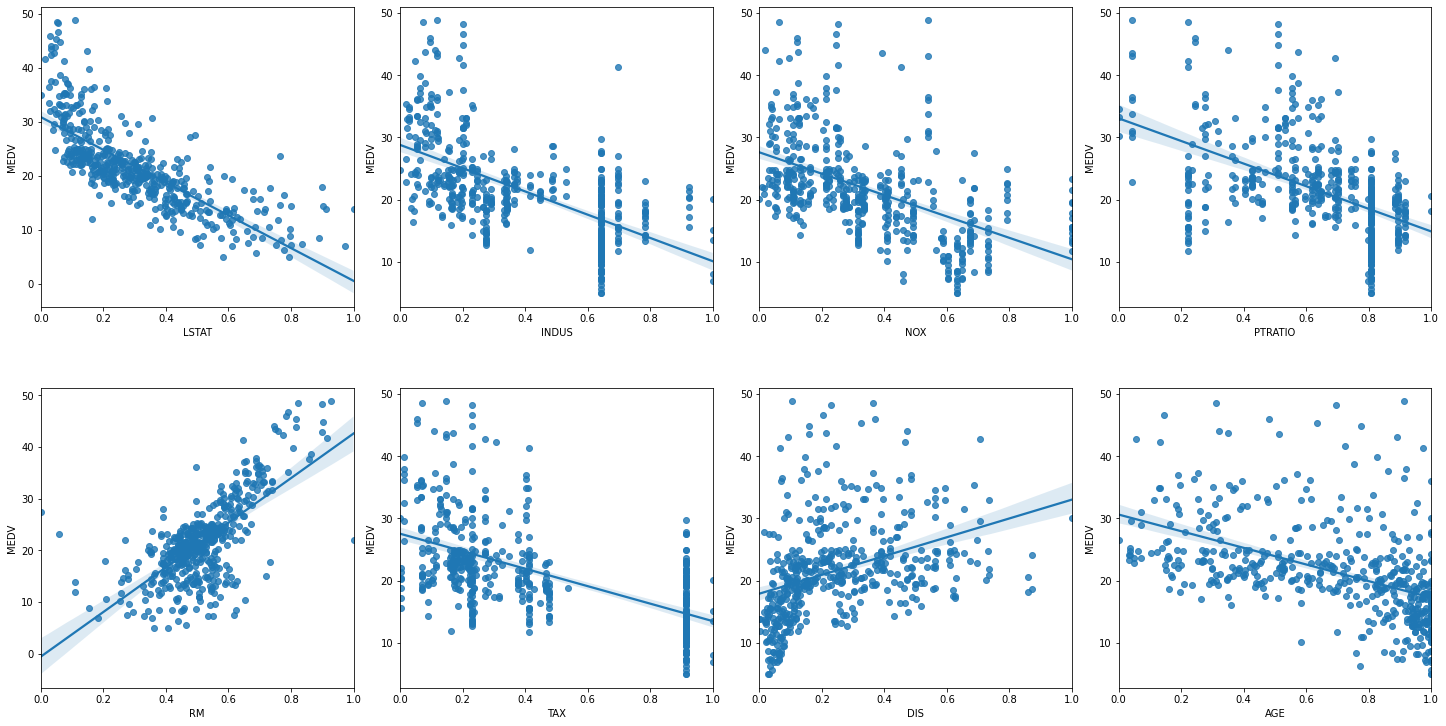

In [37]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#see in regplot and regression line which point close to regression line
#see our output column MEDV in y axis
#all input column in x axis
#see MEDV with LSTAT graph this all points are vary close to regreesion line
#so the impact of LSTAT in MEDV are very high
#you can also see in corelation metrix

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train_test_split(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 20)
scaler = MinMaxScaler((-1,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
#fit the model with train data. 
model = lr.fit(x_train,y_train)

In [46]:
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)

R2 Score for train data is  0.7572351454507497
R2 Score for test data is  0.7196588573419489


In [48]:
linear_coef = model.coef_
linear_coef
#in liner regression y = m1x1 + m2x2 + m3x3 + m4x4 + ......
#so all m1 to m8 value over here

array([-7.17948301, -1.16082658, -3.21638   , -3.95427746, 10.00446802,
       -1.26166342, -6.02280564, -1.13290525])

In [72]:
#see many to gather
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [73]:
key = ['linierregrassion','RandomForest','supportVector']
value = [LinearRegression(),RandomForestRegressor(),SVR()]
models = dict(zip(key,value))
print(models)
#see in models to models are ready LinearRegression and RandomForestRegressor

{'linierregrassion': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'RandomForest': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'supportVector': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}


In [70]:
x = {'aksh':1234,'vasu':4321,'ganderi':987,'darshan':7890}
for key,value in x.items():
  print(key,value)

aksh 1234
vasu 4321
ganderi 987
darshan 7890


In [82]:
ScoreOfModel = []
z = []
for name,algo in models.items():
    model = algo
    model.fit(x_train,y_train)
    predict  = model.predict(x_test)
    score = model.score(x_test,y_test)
    z.append(name)
    z.append(score)
    ScoreOfModel.append(z)
    z = []


print(ScoreOfModel)

[['linierregrassion', 0.7196588573419489], ['RandomForest', 0.8436526608185786], ['supportVector', 0.7652471260140106]]
